<a href="https://colab.research.google.com/github/varunshukla039/aml-lab/blob/main/aml_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/varunshukla039/aml-lab/main/heart.csv')

In [32]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# EXPLORE DATA ANALYSIS

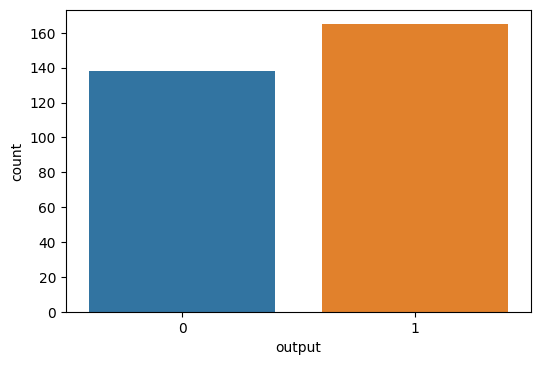

In [36]:
plt.figure(dpi=100)
sns.countplot(x=df['output'])

The price_range is balance, with each price_range is 500 count.

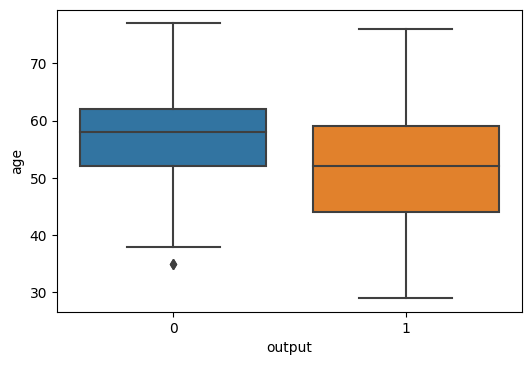

In [37]:
plt.figure(dpi=100)
sns.boxplot(data=df, x='output',y='age')

price_range 0,2, and 3 have outlier. price_range 1 dont have outlier

<Figure size 600x400 with 0 Axes>

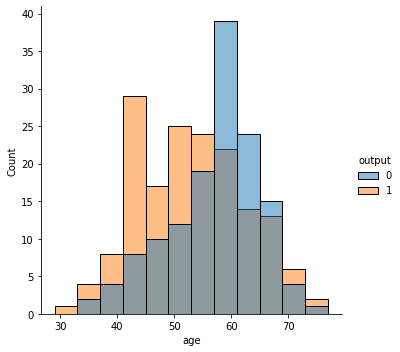

In [39]:
plt.figure(dpi=100)
sns.displot(x=df['age'], hue=df['output'])

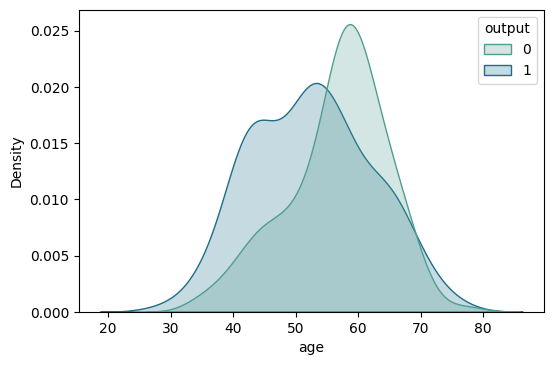

In [40]:
plt.figure(dpi=100)
sns.kdeplot(x=df['age'], fill=True, hue=df['output'], palette='crest')

In [41]:
df.corr()['output'].sort_values()

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
output      1.000000
Name: output, dtype: float64

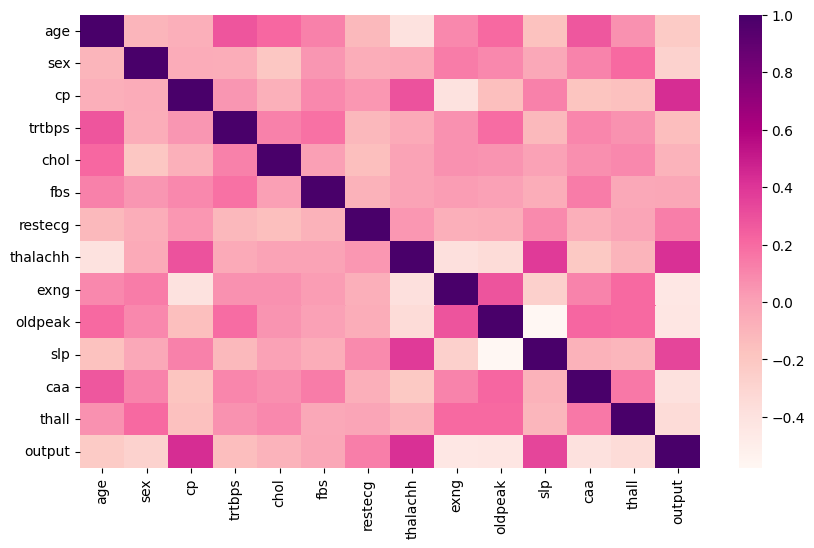

In [42]:
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(df.corr(), cmap='RdPu')

In [44]:
X = df.drop('output',axis = 1)
y = df['output']

## DEFINE X and Y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelling

In [45]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

###Decision Tree

In [51]:
dectree=DecisionTreeClassifier(random_state=0)
dectree.fit(X_train,y_train)
prediction=dectree.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.7252747252747253


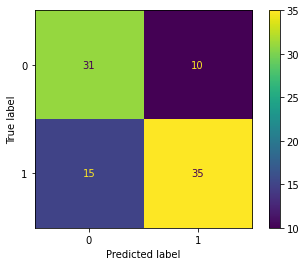

In [52]:
plot_confusion_matrix(dectree,X_test,y_test)
plt.grid(False)
plt.show()

###Logistic Regression

In [53]:
# Logistic Regression
Log= LogisticRegression(random_state=0)
Log.fit(scaled_X_train,y_train)
log_pred = Log.predict(scaled_X_test)

In [54]:
#Confusion Matrix
confusion_matrix(y_test,log_pred)

array([[32,  9],
       [ 8, 42]])

In [55]:
print("Classification Report : Logistic Regression")
print(classification_report(y_test,log_pred))

Classification Report : Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### Multi Layer Perceptron

In [56]:
mlp=MLPClassifier(alpha=1, max_iter=500,random_state=0).fit(X_train,y_train)
y_prediction = mlp.predict(X_test)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_prediction,y_test))

The accuracy of the model on validation set is 0.8131868131868132


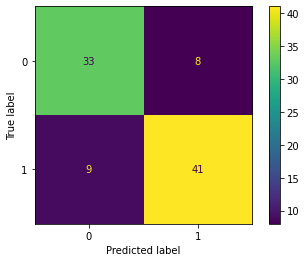

In [57]:
plot_confusion_matrix(mlp,X_test,y_test)
plt.grid(False)
plt.show()

###SVM 

In [58]:
types=['rbf','linear']
for i in types:
    SVM=svm.SVC(kernel=i)
    SVM.fit(X_train,y_train)
    prediction=SVM.predict(X_test)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,y_test))

Accuracy for SVM kernel= rbf is 0.7032967032967034
Accuracy for SVM kernel= linear is 0.8131868131868132


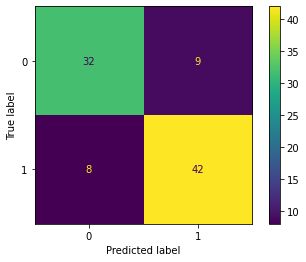

In [59]:
plot_confusion_matrix(SVM,X_test,y_test)
plt.grid(False)
plt.show()

### Adaboost Algorithm

In [60]:
adab = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100, random_state= 0)
adab.fit(X_train,y_train)
y_predict= adab.predict(X_test)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_predict,y_test))

The accuracy of the model on validation set is 0.8131868131868132


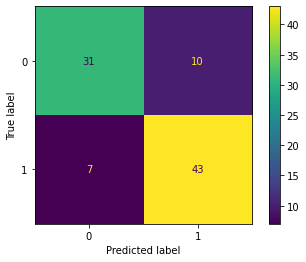

In [61]:
plot_confusion_matrix(adab,X_test,y_test)
plt.grid(False)
plt.show()

### Random Forest

In [62]:
ranF = RandomForestClassifier(criterion= 'entropy', n_estimators= 300, random_state= 0)
ranF.fit(X_train, y_train)
y_pred = ranF.predict(X_test)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_pred,y_test))

The accuracy of the model on validation set is 0.7912087912087912


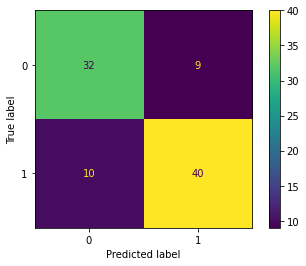

In [63]:
plot_confusion_matrix(ranF,X_test,y_test)
plt.grid(False)
plt.show()

### K-Means Clustering

In [64]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=1, random_state=0).fit(X_train)
y_mean = kmean.predict(X_test)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_mean,y_test))


The accuracy of the model on validation set is 0.45054945054945056


In [65]:
print(confusion_matrix(y_test,y_mean))

[[41  0]
 [50  0]]


### PCA

### Balanced and Unbalanced Datasets

### Comparison of Machine Learning Algorithms

In [66]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','MLP','Random Forest','Adaboost','K-means']
models=[
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0),
    MLPClassifier(alpha=1, max_iter=500,random_state=0),
    RandomForestClassifier(criterion= 'entropy', n_estimators= 300, random_state= 0),
    AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100, random_state= 0),
    KMeans(n_clusters=1, random_state=0)]

for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.813187
Radial Svm,0.703297
Logistic Regression,0.813187
Decision Tree,0.725275
MLP,0.813187
Random Forest,0.791209
Adaboost,0.813187
K-means,0.450549
